In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model27_0 = Model3(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : HybridPoolingV0(x,pool1 = nn.MaxPool2d, pool2 = None),
    post_conv=post_conv0,
)
he_initialization(model27_0)
describe(model27_0)

MACs: 24.32 MMac, Params: 3.5 k
Layer (type:depth-idx)                   Output Shape              Param #
Model3                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─HybridPoolingV0: 2-3              [1, 20, 64, 64]           --
│    │    └─MaxPool2d: 3-3               [1, 20, 64, 64]           --
│    │    └─Sequential: 3-4              [1, 20, 64, 64]           40
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 64, 64]           --
│    │    └─BatchNorm2d: 3-5             [1, 10, 6

Loading checkpoint from model_weights/model27_0.pt
Starting
Epoch 1/10: Train loss = 0.6094, Train accuracy = 0.6613, Test loss = 0.6142, Test accuracy = 0.6583


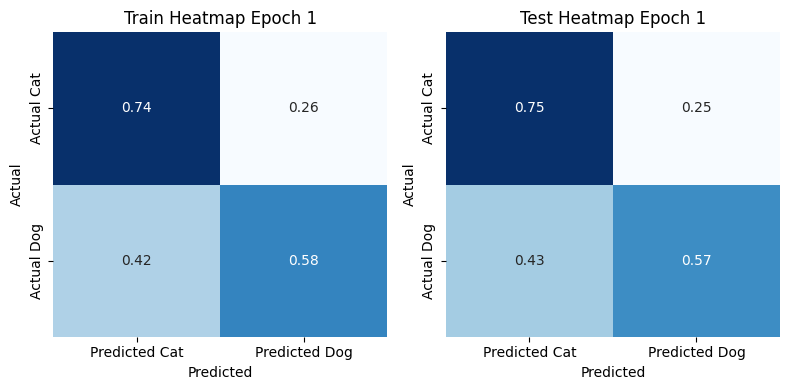

Epoch 2/10: Train loss = 0.5612, Train accuracy = 0.7132, Test loss = 0.5734, Test accuracy = 0.7094


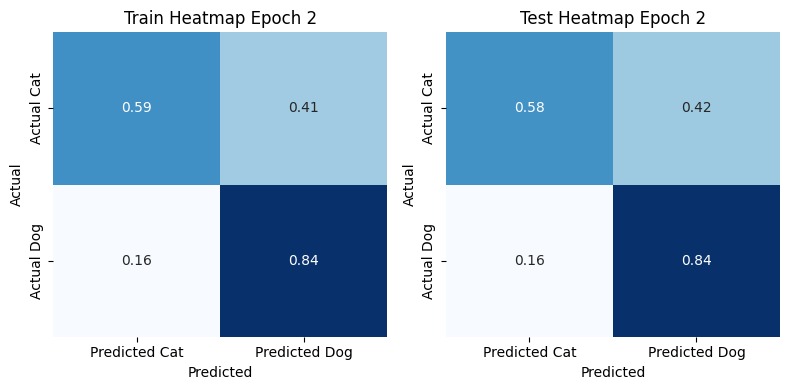

Epoch 3/10: Train loss = 0.4918, Train accuracy = 0.7655, Test loss = 0.5019, Test accuracy = 0.7561


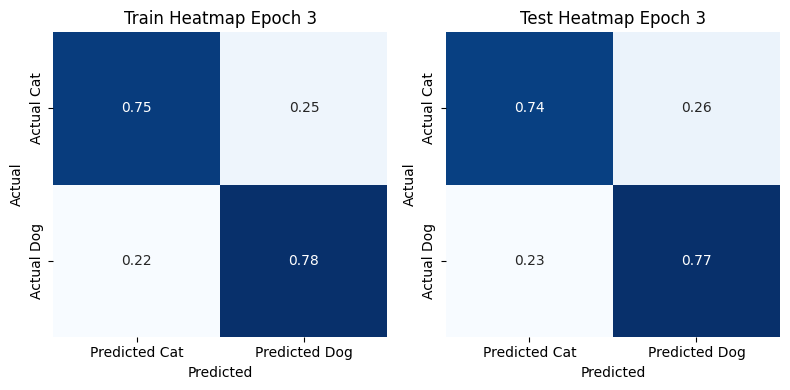

Epoch 4/10: Train loss = 0.4766, Train accuracy = 0.7783, Test loss = 0.4907, Test accuracy = 0.7672


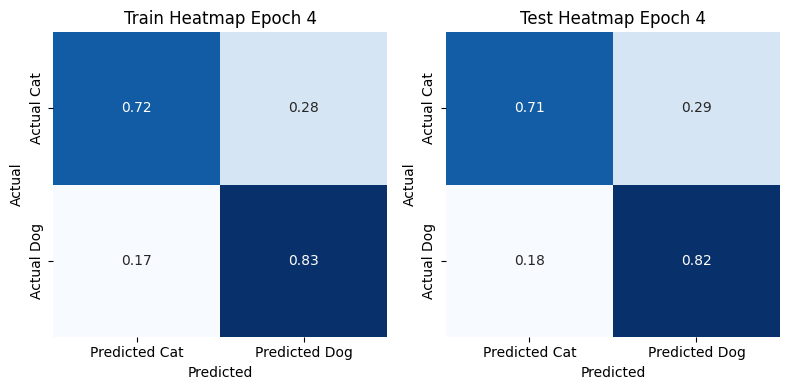

Epoch 5/10: Train loss = 0.4405, Train accuracy = 0.7967, Test loss = 0.4638, Test accuracy = 0.7833


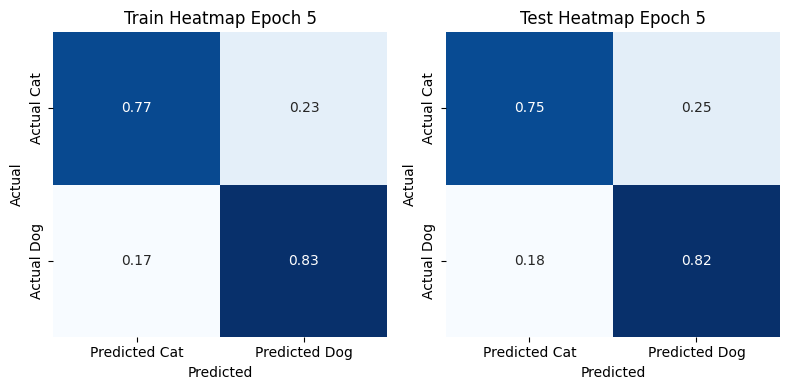

Epoch 6/10: Train loss = 0.4291, Train accuracy = 0.8014, Test loss = 0.4580, Test accuracy = 0.7838


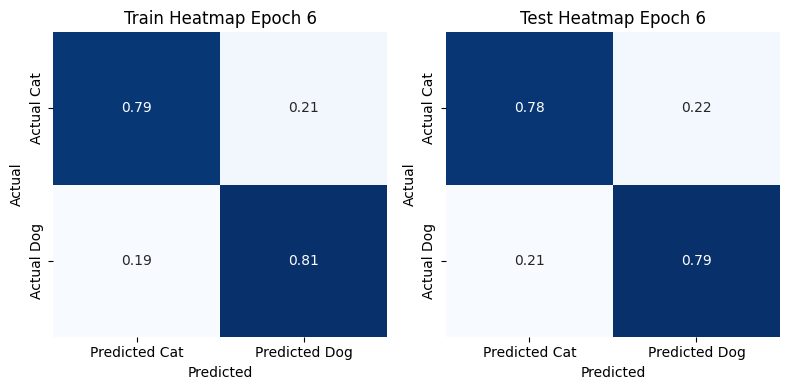

Epoch 7/10: Train loss = 0.4113, Train accuracy = 0.8132, Test loss = 0.4425, Test accuracy = 0.7945


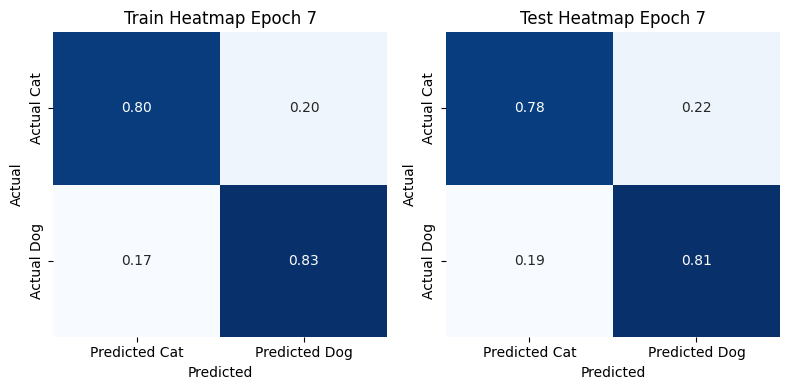

Epoch 8/10: Train loss = 0.3972, Train accuracy = 0.8199, Test loss = 0.4292, Test accuracy = 0.8019


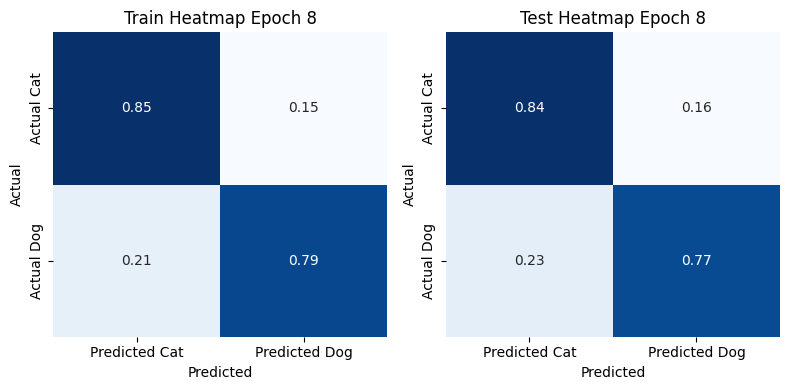

Epoch 9/10: Train loss = 0.3898, Train accuracy = 0.8254, Test loss = 0.4284, Test accuracy = 0.8050


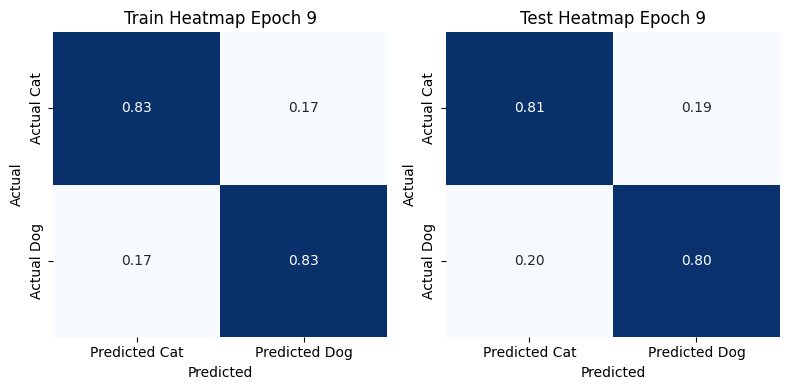

Epoch 10/10: Train loss = 0.3881, Train accuracy = 0.8262, Test loss = 0.4258, Test accuracy = 0.8050


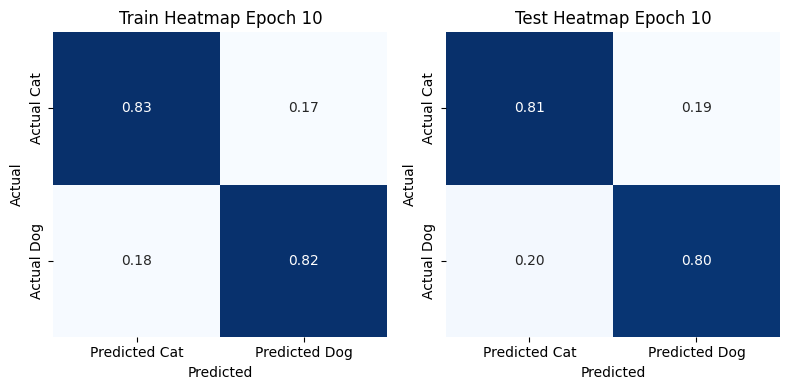

Training complete.


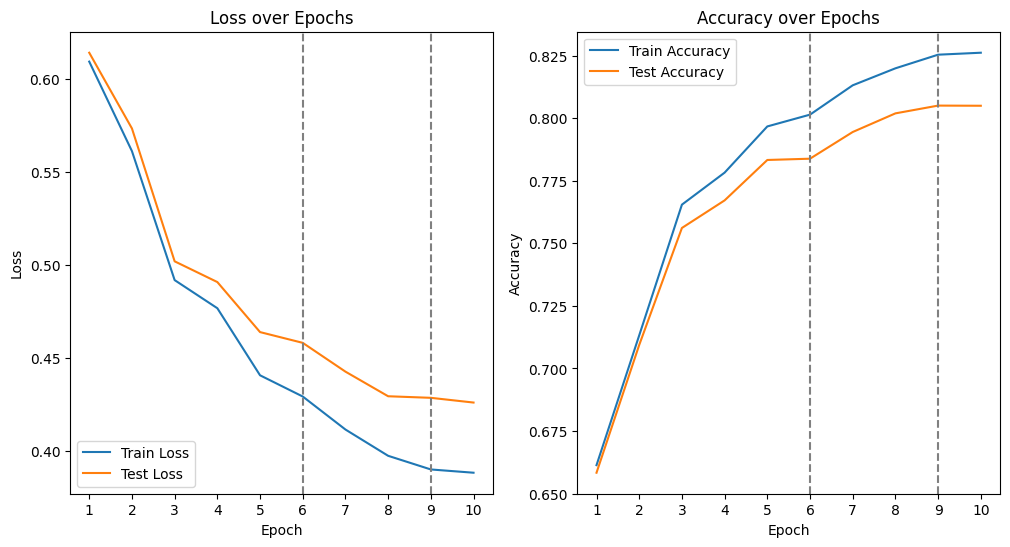

In [5]:
train(model27_0,"model_weights/model27_0.pt",criterion,train_dataset,test_dataset)